<a href="https://colab.research.google.com/github/jajovp/Data-analyst-tutorials/blob/main/Analisis_predictivo_de_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Carga de datos
df = pd.read_csv("data.csv")

In [3]:
# Preprocesamiento y limpieza de datos
# Eliminar columnas irrelevantes
df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis=1, inplace=True)


In [4]:

# Eliminar filas duplicadas
df.drop_duplicates(keep='first', inplace=True)

In [5]:
# Eliminar filas con valores nulos
df.dropna(axis=0, inplace=True)

In [6]:
# Codificación de variables categóricas
encoder = LabelEncoder()
df['Make'] = encoder.fit_transform(df['Make'])
df['Model'] = encoder.fit_transform(df['Model'])
df['Transmission Type'] = encoder.fit_transform(df['Transmission Type'])
df['Driven_Wheels'] = encoder.fit_transform(df['Driven_Wheels'])

In [7]:
# Separación de características y variable objetivo
X = df.drop('MSRP', axis=1)
y = df['MSRP']

In [8]:
# Escalado de características
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [9]:
# Entrenamiento y evaluación del modelo con diferentes proporciones de entrenamiento y prueba
train_sizes = [0.6, 0.7, 0.8, 0.9]
r2_scores = []

for size in train_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=size, random_state=42)
    
    # Entrenamiento del modelo
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    # Evaluación del modelo
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)
    print(f"Proporción de entrenamiento: {size}, MSE: {mse}, R2: {r2}")


Proporción de entrenamiento: 0.6, MSE: 452556283.86061364, R2: 0.8922209269395254
Proporción de entrenamiento: 0.7, MSE: 452666564.9106745, R2: 0.9050874339600397
Proporción de entrenamiento: 0.8, MSE: 248492055.0855349, R2: 0.9462915441875126
Proporción de entrenamiento: 0.9, MSE: 90121905.78037265, R2: 0.9637682932780037


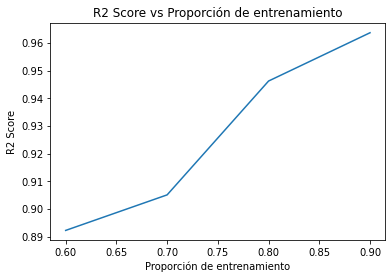

In [10]:
# Gráfica de resultados
plt.plot(train_sizes, r2_scores)
plt.xlabel('Proporción de entrenamiento')
plt.ylabel('R2 Score')
plt.title('R2 Score vs Proporción de entrenamiento')
plt.show()